In [1]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
import utils as ut
from rumex_dataset import RumexDataset
from rumex_model import RumexNet
from torch_lr_finder import LRFinder
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data_dir = '/u/21/hiremas1/unix/postdoc/rumex/data_for_fastai_cleaned/'
bs = 50
num_epochs = 50
lr = 1.0e-3
gpu = True
log_freq = 9
path_tr = os.path.join(data_dir, 'train')
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs)
loss_fn = nn.CrossEntropyLoss(reduction="mean")


Bad key "text.kerning_factor" on line 4 in
/u/21/hiremas1/unix/anaconda3/envs/rumex_pl_latest/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
model_name = 'alexnet'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-10, weight_decay=1e-2)

66%|██████▌   | 66/100 [00:53<00:27,  1.24it/s]Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()



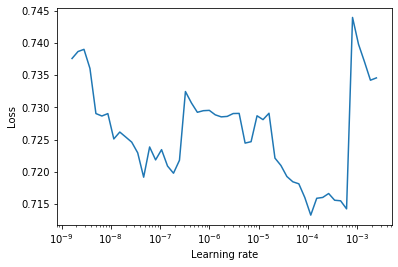

In [6]:
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
# lr_finder.reset() # to reset the model and optimizer to their initial state

85%|████████▌ | 85/100 [02:56<00:31,  2.08s/it]Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()



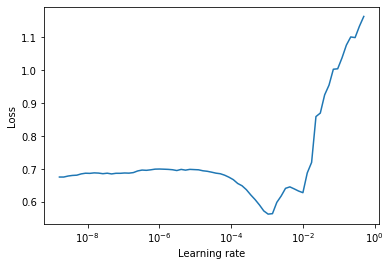

In [5]:
model_name = 'resnet50'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-10, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot()

84%|████████▍ | 84/100 [03:09<00:36,  2.26s/it]Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()



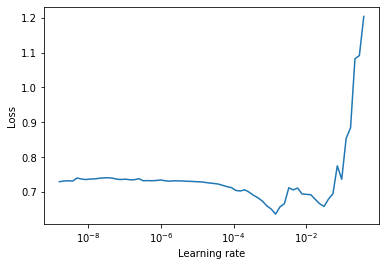

In [5]:
model_name = 'mobilenet_v2'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-10, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot()

Downloading: "https://download.pytorch.org/models/shufflenetv2_x0.5-f707e7126e.pth" to /u/21/hiremas1/unix/.cache/torch/hub/checkpoints/shufflenetv2_x0.5-f707e7126e.pth
100%|██████████| 5.28M/5.28M [00:00<00:00, 6.28MB/s]
 81%|████████  | 81/100 [00:30<00:07,  2.65it/s]Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()



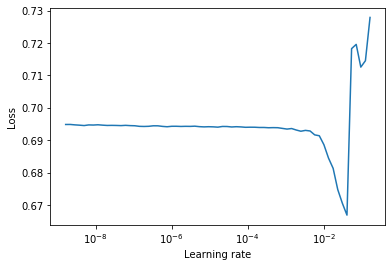

In [2]:
model_name = 'shufflenet_v2'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-10, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot()

Downloading: "https://download.pytorch.org/models/mnasnet0.5_top1_67.823-3ffadce67e.pth" to /u/21/hiremas1/unix/.cache/torch/hub/checkpoints/mnasnet0.5_top1_67.823-3ffadce67e.pth
100%|██████████| 8.59M/8.59M [00:00<00:00, 9.09MB/s]
 84%|████████▍ | 84/100 [01:26<00:16,  1.04s/it]Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()



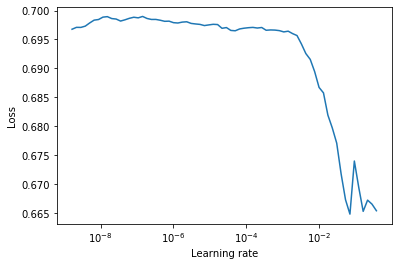

In [2]:
model_name = 'mnasnet0_5'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-10, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot()

In [3]:
900/60

15.0